In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ffn
%matplotlib inline
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
import ta as ta
from ta import add_all_ta_features
from ta.utils import dropna

In [3]:
data = pd.read_csv(r'C:\Users\hp\Documents\Mean Reversion\NIFTY 50_Data.csv', index_col='Date', parse_dates=True)

In [4]:
data.head()

,Close
Date,
2023-05-04,18255.80
2023-05-03,18089.85
2023-05-02,18147.65
2023-04-28,18065.00
2023-04-27,17915.05


In [5]:
data.tail()

,Close
Date,
2013-05-10,6094.7
2013-05-09,6050.1
2013-05-08,6069.3
2013-05-07,6043.5
2013-05-06,5971.0


In [6]:
data.sort_values(by=['Date'], inplace=True)

In [7]:
data.head()

,Close
Date,
2013-05-06,5971.0
2013-05-07,6043.5
2013-05-08,6069.3
2013-05-09,6050.1
2013-05-10,6094.7


In [8]:
data.tail()

,Close
Date,
2023-04-27,17915.05
2023-04-28,18065.00
2023-05-02,18147.65
2023-05-03,18089.85
2023-05-04,18255.80


In [9]:
somedata = ta.momentum.RSIIndicator(data['Close'])

In [11]:
somedata.rsi()

Date
2013-05-06          NaN
2013-05-07          NaN
2013-05-08          NaN
2013-05-09          NaN
2013-05-10          NaN
                ...    
2023-04-27    66.845643
2023-04-28    71.235000
2023-05-02    73.330807
2023-05-03    69.516261
2023-05-04    73.739901
Name: rsi, Length: 2474, dtype: float64

In [12]:
somedata.rsi().head(14)

Date
2013-05-06          NaN
2013-05-07          NaN
2013-05-08          NaN
2013-05-09          NaN
2013-05-10          NaN
2013-05-11          NaN
2013-05-13          NaN
2013-05-14          NaN
2013-05-15          NaN
2013-05-16          NaN
2013-05-17          NaN
2013-05-20          NaN
2013-05-21          NaN
2013-05-22    55.961349
Name: rsi, dtype: float64

In [10]:
data['rsi'] = somedata.rsi()

In [11]:
data.head(14)

,Close,rsi
Date,,
2013-05-06,5971.0,NaN
2013-05-07,6043.5,NaN
2013-05-08,6069.3,NaN
2013-05-09,6050.1,NaN
2013-05-10,6094.7,NaN
2013-05-11,6107.2,NaN
2013-05-13,5980.4,NaN
2013-05-14,5995.4,NaN
2013-05-15,6146.7,NaN


In [12]:
data.tail()

,Close,rsi
Date,,
2023-04-27,17915.05,66.845643
2023-04-28,18065.00,71.235000
2023-05-02,18147.65,73.330807
2023-05-03,18089.85,69.516261
2023-05-04,18255.80,73.739901


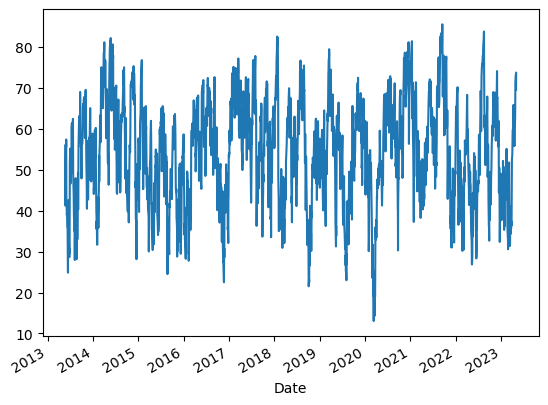

In [13]:
fig, ax = plt.subplots()
data['rsi'].plot(ax=ax)
plt.show()

In [14]:
data['daily_return'] = data['Close'].pct_change()

In [24]:
data['rsi_yesterday'] = data['rsi'].shift()

In [25]:
data['rsi_yesterday_chg'] = data['rsi_yesterday'].pct_change()

In [29]:
data['ema5'] = data['rsi_yesterday'].ewm(span=5).mean()

In [30]:
data['ema30'] = data['rsi_yesterday'].ewm(span=30).mean()

In [31]:
data.head()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,ema5,ema30
Date,,,,,,,
2013-05-06,5971.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-07,6043.5,NaN,0.012142,NaN,NaN,NaN,NaN
2013-05-08,6069.3,NaN,0.004269,NaN,NaN,NaN,NaN
2013-05-09,6050.1,NaN,-0.003163,NaN,NaN,NaN,NaN
2013-05-10,6094.7,NaN,0.007372,NaN,NaN,NaN,NaN


In [32]:
data.tail()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,ema5,ema30
Date,,,,,,,
2023-04-27,17915.05,66.845643,0.005695,63.330327,0.026739,60.781540,52.861012
2023-04-28,18065.00,71.235000,0.008370,66.845643,0.055508,62.802908,53.763247
2023-05-02,18147.65,73.330807,0.004575,71.235000,0.065664,65.613605,54.890457
2023-05-03,18089.85,69.516261,-0.003185,73.330807,0.029421,68.186006,56.080157
2023-05-04,18255.80,73.739901,0.009174,69.516261,-0.052018,68.629424,56.947002


In [33]:
data['sma5'] = data['rsi_yesterday'].rolling(5).mean()

In [34]:
data['sma30'] = data['rsi_yesterday'].rolling(30).mean()

In [35]:
data.head()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,ema5,ema30,sma5,sma30
Date,,,,,,,,,
2013-05-06,5971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-07,6043.5,NaN,0.012142,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-08,6069.3,NaN,0.004269,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-09,6050.1,NaN,-0.003163,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-10,6094.7,NaN,0.007372,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
data.tail()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,ema5,ema30,sma5,sma30
Date,,,,,,,,,
2023-04-27,17915.05,66.845643,0.005695,63.330327,0.026739,60.781540,52.861012,59.559709,48.829503
2023-04-28,18065.00,71.235000,0.008370,66.845643,0.055508,62.802908,53.763247,61.720530,49.686505
2023-05-02,18147.65,73.330807,0.004575,71.235000,0.065664,65.613605,54.890457,64.763400,50.893076
2023-05-03,18089.85,69.516261,-0.003185,73.330807,0.029421,68.186006,56.080157,67.284565,52.244405
2023-05-04,18255.80,73.739901,0.009174,69.516261,-0.052018,68.629424,56.947002,68.851608,53.514917


In [37]:
data['sma_signal'] = data['sma5'] - data['sma30']

In [38]:
data['ema_signal'] = data['ema5'] - data['ema30']

In [39]:
data.head(30)

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,ema5,ema30,sma5,sma30,sma_signal,ema_signal
Date,,,,,,,,,,,
2013-05-06,5971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-07,6043.5,NaN,0.012142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-08,6069.3,NaN,0.004269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-09,6050.1,NaN,-0.003163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-10,6094.7,NaN,0.007372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-11,6107.2,NaN,0.002051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-13,5980.4,NaN,-0.020762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-14,5995.4,NaN,0.002508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-15,6146.7,NaN,0.025236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
data.tail()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,ema5,ema30,sma5,sma30,sma_signal,ema_signal
Date,,,,,,,,,,,
2023-04-27,17915.05,66.845643,0.005695,63.330327,0.026739,60.781540,52.861012,59.559709,48.829503,10.730206,7.920528
2023-04-28,18065.00,71.235000,0.008370,66.845643,0.055508,62.802908,53.763247,61.720530,49.686505,12.034026,9.039661
2023-05-02,18147.65,73.330807,0.004575,71.235000,0.065664,65.613605,54.890457,64.763400,50.893076,13.870324,10.723149
2023-05-03,18089.85,69.516261,-0.003185,73.330807,0.029421,68.186006,56.080157,67.284565,52.244405,15.040160,12.105850
2023-05-04,18255.80,73.739901,0.009174,69.516261,-0.052018,68.629424,56.947002,68.851608,53.514917,15.336691,11.682422


In [47]:
df = data[['sma5', 'sma30']]

In [48]:
df.head()

,sma5,sma30
Date,,
2013-05-06,NaN,NaN
2013-05-07,NaN,NaN
2013-05-08,NaN,NaN
2013-05-09,NaN,NaN
2013-05-10,NaN,NaN


In [49]:
df.tail()

,sma5,sma30
Date,,
2023-04-27,59.559709,48.829503
2023-04-28,61.720530,49.686505
2023-05-02,64.763400,50.893076
2023-05-03,67.284565,52.244405
2023-05-04,68.851608,53.514917


In [50]:
df.dropna(inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_5200\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


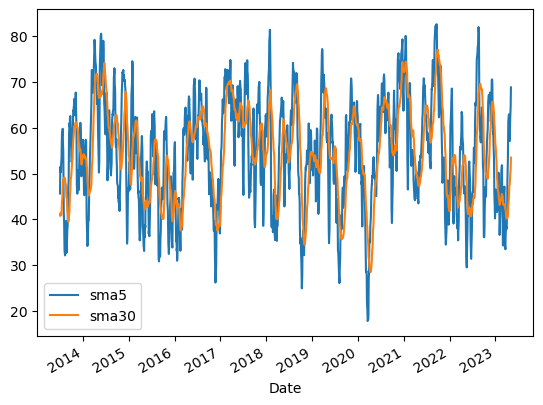

In [51]:
fig, ax = plt.subplots()
#data.plot(x=data.index, y=['sma5', 'sma30'], ax=ax)
df.plot(ax=ax)
plt.show()

In [52]:
data.head()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,ema5,ema30,sma5,sma30,sma_signal,ema_signal
Date,,,,,,,,,,,
2013-05-06,5971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-07,6043.5,NaN,0.012142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-08,6069.3,NaN,0.004269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-09,6050.1,NaN,-0.003163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-10,6094.7,NaN,0.007372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
data.tail()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,ema5,ema30,sma5,sma30,sma_signal,ema_signal
Date,,,,,,,,,,,
2023-04-27,17915.05,66.845643,0.005695,63.330327,0.026739,60.781540,52.861012,59.559709,48.829503,10.730206,7.920528
2023-04-28,18065.00,71.235000,0.008370,66.845643,0.055508,62.802908,53.763247,61.720530,49.686505,12.034026,9.039661
2023-05-02,18147.65,73.330807,0.004575,71.235000,0.065664,65.613605,54.890457,64.763400,50.893076,13.870324,10.723149
2023-05-03,18089.85,69.516261,-0.003185,73.330807,0.029421,68.186006,56.080157,67.284565,52.244405,15.040160,12.105850
2023-05-04,18255.80,73.739901,0.009174,69.516261,-0.052018,68.629424,56.947002,68.851608,53.514917,15.336691,11.682422


In [54]:
data['sma_direction'] = data['sma_signal'].mul(data['daily_return'])

In [55]:
data['ema_direction'] = data['ema_signal'].mul(data['daily_return'])

In [56]:
data.head()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,ema5,ema30,sma5,sma30,sma_signal,ema_signal,sma_direction,ema_direction
Date,,,,,,,,,,,,,
2013-05-06,5971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-07,6043.5,NaN,0.012142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-08,6069.3,NaN,0.004269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-09,6050.1,NaN,-0.003163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-10,6094.7,NaN,0.007372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
data.tail()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,ema5,ema30,sma5,sma30,sma_signal,ema_signal,sma_direction,ema_direction
Date,,,,,,,,,,,,,
2023-04-27,17915.05,66.845643,0.005695,63.330327,0.026739,60.781540,52.861012,59.559709,48.829503,10.730206,7.920528,0.061109,0.045108
2023-04-28,18065.00,71.235000,0.008370,66.845643,0.055508,62.802908,53.763247,61.720530,49.686505,12.034026,9.039661,0.100725,0.075662
2023-05-02,18147.65,73.330807,0.004575,71.235000,0.065664,65.613605,54.890457,64.763400,50.893076,13.870324,10.723149,0.063459,0.049060
2023-05-03,18089.85,69.516261,-0.003185,73.330807,0.029421,68.186006,56.080157,67.284565,52.244405,15.040160,12.105850,-0.047903,-0.038557
2023-05-04,18255.80,73.739901,0.009174,69.516261,-0.052018,68.629424,56.947002,68.851608,53.514917,15.336691,11.682422,0.140693,0.107170


In [58]:
data.loc[data['sma_direction'] > 0, 'sma_direction'] = 1
data.loc[data['sma_direction'] < 0, 'sma_direction'] = -1

In [59]:
data.loc[data['ema_direction'] > 0, 'ema_direction'] = 1
data.loc[data['ema_direction'] < 0, 'ema_direction'] = -1

In [60]:
data.head()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,ema5,ema30,sma5,sma30,sma_signal,ema_signal,sma_direction,ema_direction
Date,,,,,,,,,,,,,
2013-05-06,5971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-07,6043.5,NaN,0.012142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-08,6069.3,NaN,0.004269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-09,6050.1,NaN,-0.003163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-10,6094.7,NaN,0.007372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
data.tail()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,ema5,ema30,sma5,sma30,sma_signal,ema_signal,sma_direction,ema_direction
Date,,,,,,,,,,,,,
2023-04-27,17915.05,66.845643,0.005695,63.330327,0.026739,60.781540,52.861012,59.559709,48.829503,10.730206,7.920528,1.0,1.0
2023-04-28,18065.00,71.235000,0.008370,66.845643,0.055508,62.802908,53.763247,61.720530,49.686505,12.034026,9.039661,1.0,1.0
2023-05-02,18147.65,73.330807,0.004575,71.235000,0.065664,65.613605,54.890457,64.763400,50.893076,13.870324,10.723149,1.0,1.0
2023-05-03,18089.85,69.516261,-0.003185,73.330807,0.029421,68.186006,56.080157,67.284565,52.244405,15.040160,12.105850,-1.0,-1.0
2023-05-04,18255.80,73.739901,0.009174,69.516261,-0.052018,68.629424,56.947002,68.851608,53.514917,15.336691,11.682422,1.0,1.0


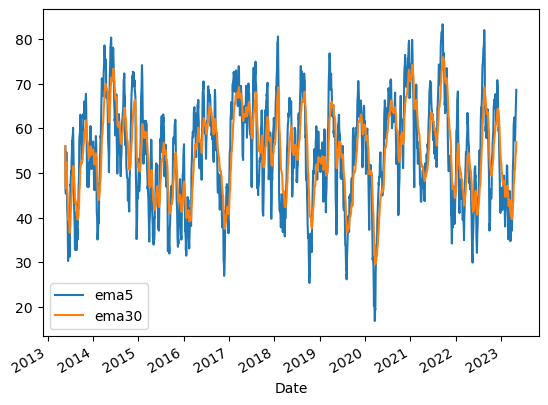

In [63]:
fig, ax = plt.subplots()
data[['ema5', 'ema30']].plot(ax=ax)
plt.show()

In [64]:
data.drop(['ema5', 'ema30', 'sma5', 'sma30'], axis=1, inplace=True)

In [65]:
data.head()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,sma_signal,ema_signal,sma_direction,ema_direction
Date,,,,,,,,,
2013-05-06,5971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-07,6043.5,NaN,0.012142,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-08,6069.3,NaN,0.004269,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-09,6050.1,NaN,-0.003163,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-10,6094.7,NaN,0.007372,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
data.tail()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,sma_signal,ema_signal,sma_direction,ema_direction
Date,,,,,,,,,
2023-04-27,17915.05,66.845643,0.005695,63.330327,0.026739,10.730206,7.920528,1.0,1.0
2023-04-28,18065.00,71.235000,0.008370,66.845643,0.055508,12.034026,9.039661,1.0,1.0
2023-05-02,18147.65,73.330807,0.004575,71.235000,0.065664,13.870324,10.723149,1.0,1.0
2023-05-03,18089.85,69.516261,-0.003185,73.330807,0.029421,15.040160,12.105850,-1.0,-1.0
2023-05-04,18255.80,73.739901,0.009174,69.516261,-0.052018,15.336691,11.682422,1.0,1.0


In [80]:
data['sma_market'] = ( 1 + data['sma_direction']*data['daily_return'] )

In [81]:
data.tail()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,sma_signal,ema_signal,sma_direction,ema_direction,sma_market,ema_market
Date,,,,,,,,,,,
2023-04-27,17915.05,66.845643,0.005695,63.330327,0.026739,10.730206,7.920528,1.0,1.0,1.005695,0.140237
2023-04-28,18065.00,71.235000,0.008370,66.845643,0.055508,12.034026,9.039661,1.0,1.0,1.008370,0.141410
2023-05-02,18147.65,73.330807,0.004575,71.235000,0.065664,13.870324,10.723149,1.0,1.0,1.004575,0.142057
2023-05-03,18089.85,69.516261,-0.003185,73.330807,0.029421,15.040160,12.105850,-1.0,-1.0,1.003185,0.142510
2023-05-04,18255.80,73.739901,0.009174,69.516261,-0.052018,15.336691,11.682422,1.0,1.0,1.009174,0.143817


In [ ]:
data['sma_market'].cumprod()

In [82]:
data['ema_market'] = ( 1 + data['ema_direction']*data['daily_return'] )

In [83]:
data.tail()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,sma_signal,ema_signal,sma_direction,ema_direction,sma_market,ema_market
Date,,,,,,,,,,,
2023-04-27,17915.05,66.845643,0.005695,63.330327,0.026739,10.730206,7.920528,1.0,1.0,1.005695,1.005695
2023-04-28,18065.00,71.235000,0.008370,66.845643,0.055508,12.034026,9.039661,1.0,1.0,1.008370,1.008370
2023-05-02,18147.65,73.330807,0.004575,71.235000,0.065664,13.870324,10.723149,1.0,1.0,1.004575,1.004575
2023-05-03,18089.85,69.516261,-0.003185,73.330807,0.029421,15.040160,12.105850,-1.0,-1.0,1.003185,1.003185
2023-05-04,18255.80,73.739901,0.009174,69.516261,-0.052018,15.336691,11.682422,1.0,1.0,1.009174,1.009174


In [ ]:
data['ema_market'].cumprod()

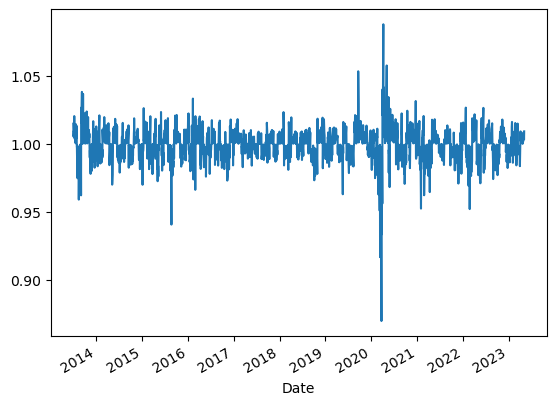

In [85]:
fig, ax = plt.subplots()
data['sma_market'].plot(ax=ax)
plt.show()

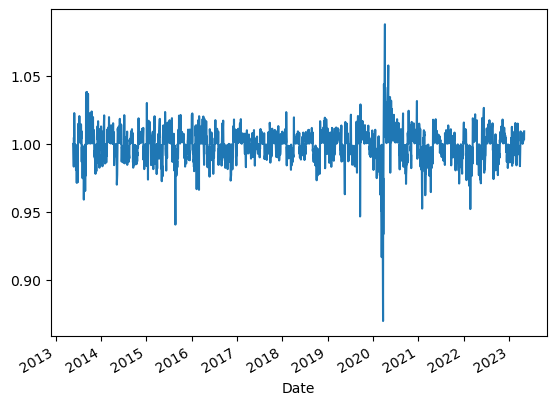

In [86]:
fig, ax = plt.subplots()
data['ema_market'].plot(ax=ax)
plt.show()

In [87]:
data['sma_market'] = ( 1 + data['sma_direction']*data['daily_return'].abs() )

In [88]:
data['ema_market'] = ( 1 + data['ema_direction']*data['daily_return'].abs() )

In [89]:
data['sma_market'].cumprod()

Date
2013-05-06         NaN
2013-05-07         NaN
2013-05-08         NaN
2013-05-09         NaN
2013-05-10         NaN
                ...   
2023-04-27    1.394660
2023-04-28    1.406334
2023-05-02    1.412768
2023-05-03    1.408268
2023-05-04    1.421187
Name: sma_market, Length: 2474, dtype: float64

In [90]:
data['ema_market'].cumprod()

Date
2013-05-06         NaN
2013-05-07         NaN
2013-05-08         NaN
2013-05-09         NaN
2013-05-10         NaN
                ...   
2023-04-27    1.571736
2023-04-28    1.584891
2023-05-02    1.592142
2023-05-03    1.587071
2023-05-04    1.601631
Name: ema_market, Length: 2474, dtype: float64

In [91]:
data['sma_market'] = data['sma_market'].cumprod()

In [92]:
data['ema_market'] = data['ema_market'].cumprod()

In [93]:
data.tail()

,Close,rsi,daily_return,rsi_yesterday,rsi_yesterday_chg,sma_signal,ema_signal,sma_direction,ema_direction,sma_market,ema_market
Date,,,,,,,,,,,
2023-04-27,17915.05,66.845643,0.005695,63.330327,0.026739,10.730206,7.920528,1.0,1.0,1.394660,1.571736
2023-04-28,18065.00,71.235000,0.008370,66.845643,0.055508,12.034026,9.039661,1.0,1.0,1.406334,1.584891
2023-05-02,18147.65,73.330807,0.004575,71.235000,0.065664,13.870324,10.723149,1.0,1.0,1.412768,1.592142
2023-05-03,18089.85,69.516261,-0.003185,73.330807,0.029421,15.040160,12.105850,-1.0,-1.0,1.408268,1.587071
2023-05-04,18255.80,73.739901,0.009174,69.516261,-0.052018,15.336691,11.682422,1.0,1.0,1.421187,1.601631


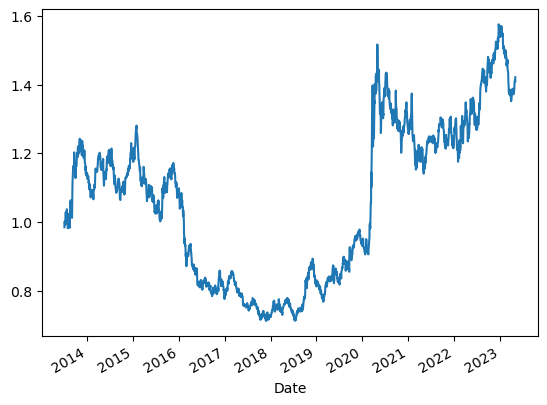

In [94]:
fig, ax = plt.subplots()
data['sma_market'].plot(ax=ax)
plt.show()

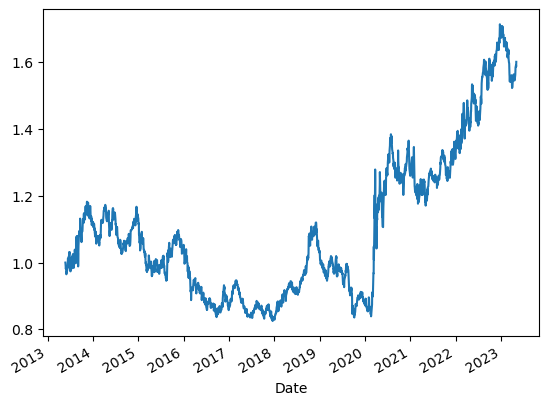

In [95]:
fig, ax = plt.subplots()
data['ema_market'].plot(ax=ax)
plt.show()

In [97]:
pip install ffn

     -------------------------------------- 109.5/109.5 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [98]:
import ffn

In [99]:
stats_sma = data['sma_market'].calc_stats()
stats_sma.display()

Stats for sma_market from 2013-05-06 00:00:00 - 2023-05-04 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
-                   0.31  3.80%   -44.34%

Annualized Returns:
mtd    3m      6m      ytd     1y      3y      5y      10y    incep.
-----  ------  ------  ------  ------  ------  ------  -----  --------
1.06%  -4.66%  -3.22%  -8.23%  10.53%  -0.18%  13.16%  3.80%  3.80%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.31     0.28       0.20
mean    5.25%    5.72%      3.75%
vol     17.11%   20.41%     18.65%
skew    1.30     1.27       0.12
kurt    15.41    7.87       -0.09
best    12.98%   33.50%     35.27%
worst   -6.62%   -16.17%    -28.41%

Drawdowns:
max      avg       # days
-------  ------  --------
-44.34%  -7.50%     175.9

Misc:
---------------  ------
avg. up month    4.49%
avg. down month  -3.96%
up year %        50.00%
1

In [100]:
stats_ema = data['ema_market'].calc_stats()
stats_ema.display()

Stats for ema_market from 2013-05-06 00:00:00 - 2023-05-04 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
-                   0.37  4.85%   -30.24%

Annualized Returns:
mtd    3m      6m     ytd     1y      3y      5y      10y    incep.
-----  ------  -----  ------  ------  ------  ------  -----  --------
1.06%  -2.94%  0.22%  -4.98%  10.23%  10.16%  11.54%  4.85%  4.85%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.37     0.40       0.26
mean    6.28%    6.29%      5.20%
vol     17.14%   15.86%     19.81%
skew    1.11     0.95       0.87
kurt    15.14    3.73       -0.21
best    12.98%   22.30%     43.28%
worst   -6.62%   -8.24%     -17.57%

Drawdowns:
max      avg       # days
-------  ------  --------
-30.24%  -4.77%     98.11

Misc:
---------------  ------
avg. up month    3.80%
avg. down month  -3.10%
up year %        50.00%
12m 

In [102]:
price_sma_ratio = data['sma_market']
ax = stats_sma.prices.to_drawdown_series().plot(figsize=(15, 8),title='Drawdown')

In [106]:
price_ema_ratio = data['ema_market']
ax = stats_ema.prices.to_drawdown_series().plot(figsize=(15, 8),title='Drawdown')